In [1]:
import pandas as pds 
import subprocess
import json
import matplotlib.pyplot as plt
import numpy as np

def get_experiments_from_path(start_path):
    experiment_dot_json_paths = subprocess.getoutput('find {} | grep experiment.json'.format(start_path))

    experiment_dot_json_paths = experiment_dot_json_paths.split('\n')
    experiments = []
    for p in experiment_dot_json_paths:
        with open(p) as f:
            experiments.append(json.load(f))
    
    return experiments

In [2]:
cores_cnn_3_raw = get_experiments_from_path("../cores_cnn_3")

print("parameters", cores_cnn_3_raw[0]["parameters"].keys())
print("results", cores_cnn_3_raw[0]["results"].keys())

  

# cores_cnn_3 = [
#     {key: e[key] for key in ["experiment_name", ]}
#     for e in cores_cnn_3
# ]

# print(cores_cnn_3)

parameters dict_keys(['experiment_name', 'lr', 'device', 'seed', 'dataset_seed', 'desired_classes', 'batch_size', 'n_epoch', 'patience', 'criteria_for_best', 'normalize_source', 'normalize_target', 'x_net', 'NUM_LOGS_PER_EPOCH', 'RESULTS_DIR', 'EXPERIMENT_JSON_PATH', 'LOSS_CURVE_PATH', 'BEST_MODEL_PATH', 'num_examples_per_class_per_domain', 'source_domains', 'target_domains'])
results dict_keys(['source_test_label_accuracy', 'source_test_label_loss', 'target_test_label_accuracy', 'target_test_label_loss', 'source_val_label_accuracy', 'source_val_label_loss', 'target_val_label_accuracy', 'target_val_label_loss', 'total_epochs_trained', 'total_experiment_time_secs', 'confusion', 'per_domain_accuracy'])


In [3]:
cores_cnn_3_processed = []

for e in cores_cnn_3_raw:
    p = {}
    p["experiment_name"]  = e["experiment_name"]
    p["source_domains"]  = str(e["parameters"]["source_domains"])
    # p["per_domain_accuracy"]  = e["results"]["per_domain_accuracy"]
    for domain,accuracy in e["results"]["per_domain_accuracy"].items():
        p[domain.format(domain)] = accuracy["accuracy"]
    
    
    cores_cnn_3_processed.append(p)

df = pds.DataFrame(cores_cnn_3_processed)
df

,experiment_name,source_domains,2,5,3,4,1
0,cores_cnn_3,[5],0.729825,0.986207,0.716590,0.680604,0.453125
1,cores_cnn_3,[5],0.700585,0.980460,0.716590,0.694541,0.464286
2,cores_cnn_3,[2],0.985057,0.721254,0.851462,0.760369,0.489955
3,cores_cnn_3,[1],0.463170,0.439024,0.430409,0.420507,0.979310
4,cores_cnn_3,[2],0.989655,0.698026,0.854971,0.747696,0.496652
5,cores_cnn_3,[1],0.474330,0.423926,0.453801,0.434332,0.987356
6,cores_cnn_3,[4],0.783626,0.701510,0.732719,0.964368,0.395089
7,cores_cnn_3,[3],0.816374,0.768873,0.983908,0.745392,0.481027
8,cores_cnn_3,[1],0.489955,0.425087,0.470175,0.420507,0.986207
9,cores_cnn_3,[3],0.814035,0.709640,0.973563,0.738479,0.496652


In [4]:
df = df.groupby("source_domains").mean()
df

,2,5,3,4,1
source_domains,,,,,
[1],0.490848,0.425319,0.463626,0.437788,0.983678
[2],0.983678,0.707782,0.847953,0.760138,0.484152
[3],0.809825,0.743786,0.977241,0.739862,0.491071
[4],0.788772,0.698955,0.729032,0.972874,0.442411
[5],0.714152,0.984828,0.737558,0.691754,0.446429


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


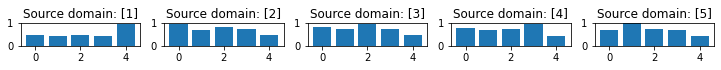

In [22]:
%matplotlib inline

fig = plt.figure(figsize=(15,30))

for i, (name, row) in enumerate(df.iterrows()):
    ax = plt.subplot(1,6, i+1)
    ax.set_title("Source domain: {}".format(name))
    ax.set_aspect('equal')
    ax.bar(range(len(row)), row)
    ax.set_ylim([0.0, 1.0])
    
    print(type(row))